# 1. Ex1 
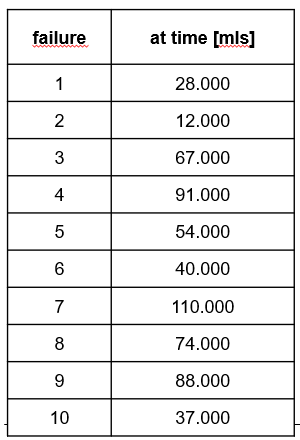

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({'time':[28,12,67,91,54,40,110,74,88,37], 'deaths_obs':[1,1,1,1,1,1,1,1,1,1], 'censored':[0,0,0,0,0,0,0,0,0,0]})
df= df.set_index('time')

from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(df, observed_deaths_col='deaths_obs', censored_col='censored')
# weights, W, is the number of occurrences of each observation - helps with data compression.
pd.DataFrame({'T':T, 'E':E, 'W':W})

,T,E,W
0,28,1,1
1,12,1,1
2,67,1,1
3,91,1,1
4,54,1,1
5,40,1,1
6,110,1,1
7,74,1,1
8,88,1,1
9,37,1,1


## 1.1 Fitting with lifelines library 

In [8]:
#Fittin the Weibull Distribution
from lifelines import WeibullFitter

wf = WeibullFitter().fit(T, E, weights=W)
wf.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 10 total observations, 0 right-censored observations>
   number of observations = 10
number of events observed = 10
           log-likelihood = -47.83
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_  67.83      10.52            47.21            88.45 6.35 <0.005      32.13
rho_      2.14       0.56             1.05             3.23 2.04   0.04       4.61
---
AIC = 99.66

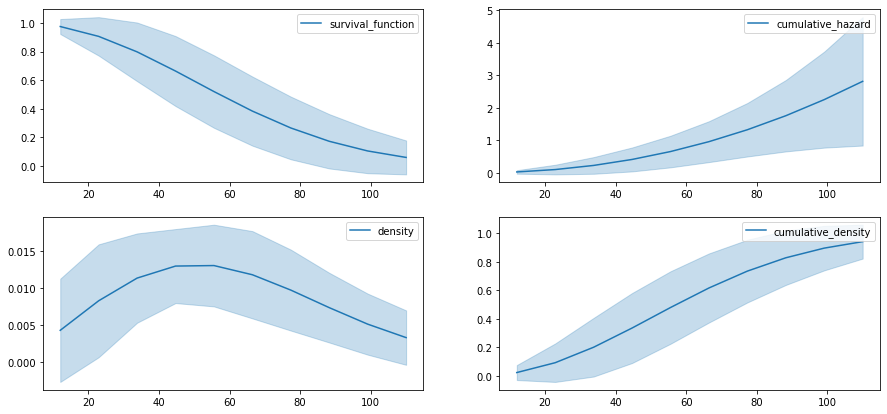

In [9]:
fig, axes = plt.subplots(2,2, figsize=(15,7))

wf.plot_survival_function(ax=axes[0][0], label='survival_function');
wf.plot_cumulative_hazard(ax=axes[0][1], label='cumulative_hazard');
wf.plot_density(ax=axes[1][0], label='density');
wf.plot_cumulative_density(ax=axes[1][1], label='cumulative_density');

## 1.2 Fitting with Reliability library 

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 10/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         67.8259         10.5204   50.0456   91.9231
     Beta         2.13969        0.557348   1.28419   3.56511 

Goodness of fit    Value
 Log-likelihood -47.8293
           AICc  101.373
            BIC  100.264
             AD  1.41198 



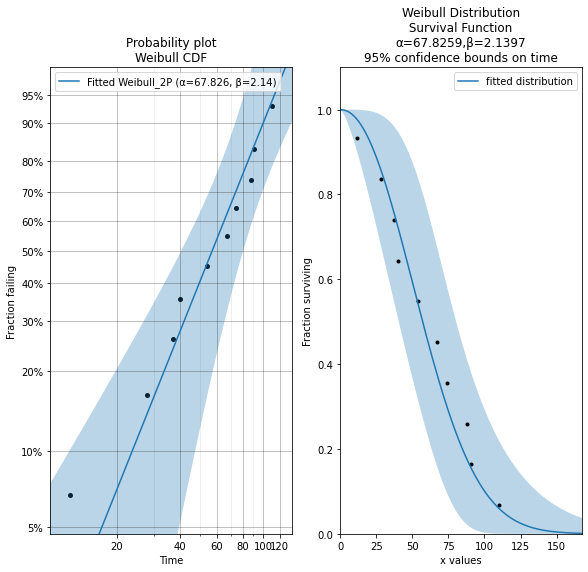

In [10]:
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt

plt.subplot(121)
fit = Fit_Weibull_2P(failures=T) # fits a Weibull distribution to the data and

#generates the probability plot
plt.subplot(122)
fit.distribution.SF(label='fitted distribution') # uses the distribution object from
#of the original distribution
plot_points(failures=T, func='SF') # overlays the original data on the survival
#function
plt.legend()
plt.show()

# 2. Ex2 

You are given the life times of failed parts of a test. Please identify the Weibull parameters!

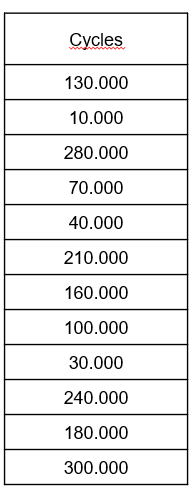

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 12 total observations, 0 right-censored observations>
   number of observations = 12
number of events observed = 12
           log-likelihood = -70.85
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_ 159.44      33.66            93.47           225.41 4.71 <0.005      18.60
rho_      1.43       0.35             0.75             2.12 1.24   0.22       2.21
---
AIC = 145.70

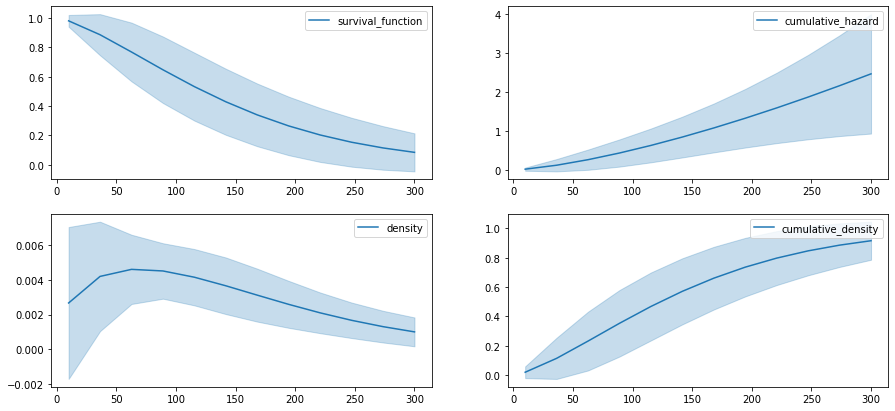

In [11]:
T = [130,10,280,70,40,210,160,100,30,240,180,300]

wf = WeibullFitter().fit(T)
wf.print_summary()

fig, axes = plt.subplots(2,2, figsize=(15,7))

wf.plot_survival_function(ax=axes[0][0], label='survival_function');
wf.plot_cumulative_hazard(ax=axes[0][1], label='cumulative_hazard');
wf.plot_density(ax=axes[1][0], label='density');
wf.plot_cumulative_density(ax=axes[1][1], label='cumulative_density');

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 12/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         159.439         33.6603   105.413   241.156
     Beta         1.43133        0.348889  0.887685   2.30792 

Goodness of fit    Value
 Log-likelihood -70.8478
           AICc  147.029
            BIC  146.665
             AD  1.30594 



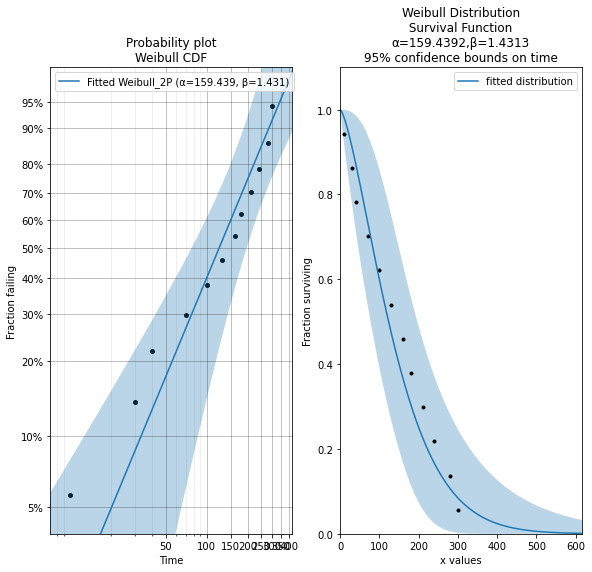

In [12]:
plt.subplot(121)
fit = Fit_Weibull_2P(failures=T) # fits a Weibull distribution to the data and

plt.subplot(122)
fit.distribution.SF(label='fitted distribution') 
plot_points(failures=T, func='SF') 

plt.legend()
plt.show()

# 3. Ex3

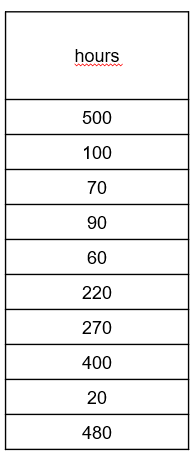

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 10 total observations, 0 right-censored observations>
   number of observations = 10
number of events observed = 10
           log-likelihood = -63.71
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_ 235.78      64.65           109.08           362.49 3.63 <0.005      11.79
rho_      1.22       0.31             0.61             1.83 0.70   0.49       1.04
---
AIC = 131.42

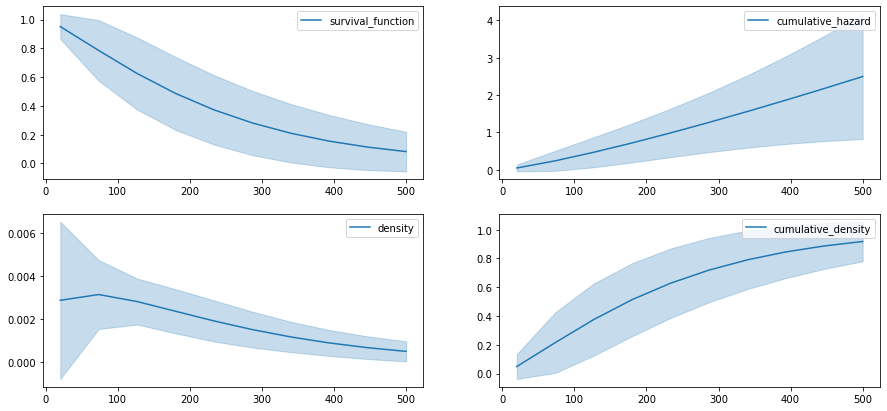

In [13]:
T = [20,60,70,90,100,220,270,400,480,500]

wf = WeibullFitter().fit(T)
wf.print_summary()

fig, axes = plt.subplots(2,2, figsize=(15,7))

wf.plot_survival_function(ax=axes[0][0], label='survival_function');
wf.plot_cumulative_hazard(ax=axes[0][1], label='cumulative_hazard');
wf.plot_density(ax=axes[1][0], label='density');
wf.plot_cumulative_density(ax=axes[1][1], label='cumulative_density');

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 10/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         235.778         64.6452    137.76   403.538
     Beta         1.21656        0.311526  0.736489   2.00957 

Goodness of fit    Value
 Log-likelihood -63.7112
           AICc  133.137
            BIC  132.028
             AD  1.56549 



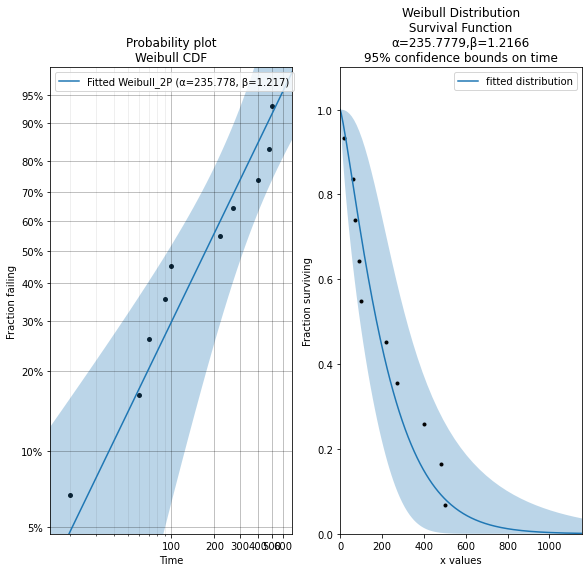

In [14]:
plt.subplot(121)
fit = Fit_Weibull_2P(failures=T) # fits a Weibull distribution to the data and

plt.subplot(122)
fit.distribution.SF(label='fitted distribution') 
plot_points(failures=T, func='SF') 

plt.legend()
plt.show()

# 4. Kaplan Meir 1

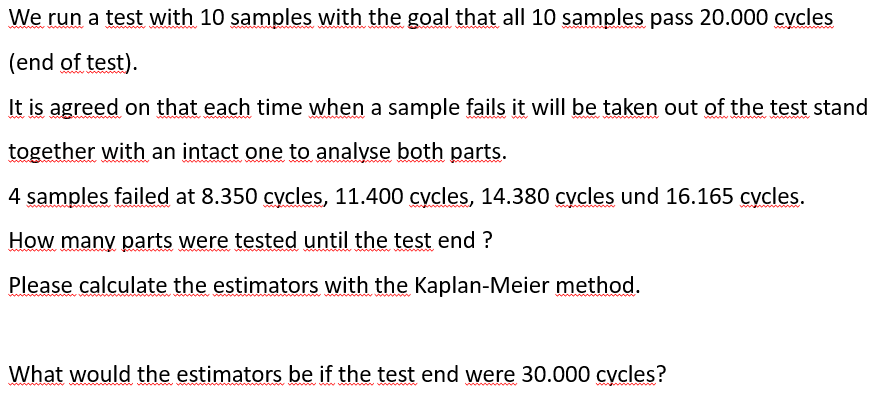

In [50]:
import pandas as pd
df = pd.DataFrame({'time':[8350,11400,14380,16165,20000], 
                   'deaths_obs':[1,1,1,1,0], 
                   'censored':[1,1,1,1,2]})

df= df.set_index('time')

from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(df, observed_deaths_col='deaths_obs', censored_col='censored')
# weights, W, is the number of occurrences of each observation - helps with data compression.
pd.DataFrame({'T':T, 'E':E, 'W':W})

,T,E,W
0,8350,1,1
1,8350,0,1
2,11400,1,1
3,11400,0,1
4,14380,1,1
5,14380,0,1
6,16165,1,1
7,16165,0,1
8,20000,0,2


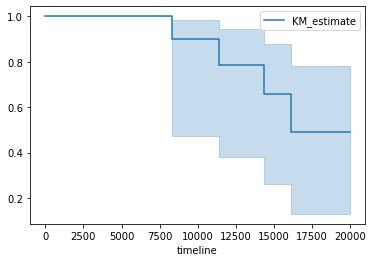

In [51]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T, E, weights=W)
kmf.plot_survival_function();

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 10 total observations, 6 right-censored observations>
   number of observations = 10
number of events observed = 4
           log-likelihood = -43.47
               hypothesis = lambda_ != 1, rho_ != 1

---
            coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_ 20288.73    3590.69         13251.11         27326.34 5.65 <0.005      25.89
rho_        3.17       1.31             0.60             5.74 1.65   0.10       3.35
---
AIC = 90.94

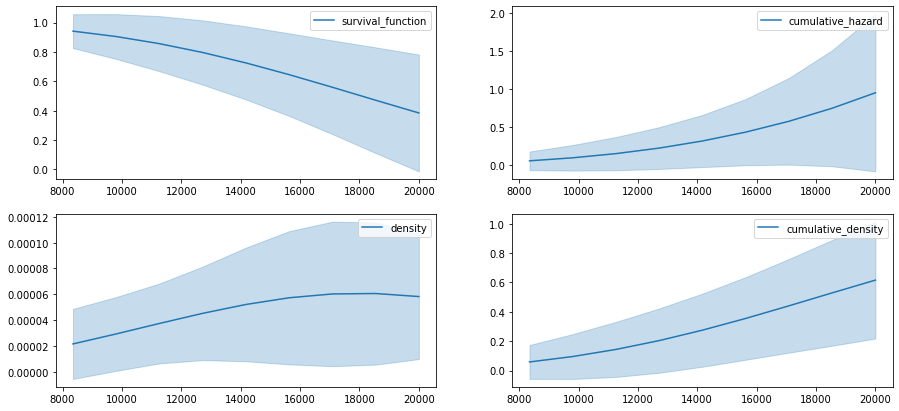

In [53]:
wf = WeibullFitter().fit(T, E, weights=W)
wf.print_summary()

fig, axes = plt.subplots(2,2, figsize=(15,7))

wf.plot_survival_function(ax=axes[0][0], label='survival_function');
wf.plot_cumulative_hazard(ax=axes[0][1], label='cumulative_hazard');
wf.plot_density(ax=axes[1][0], label='density');
wf.plot_cumulative_density(ax=axes[1][1], label='cumulative_density');

# 4 KM 2

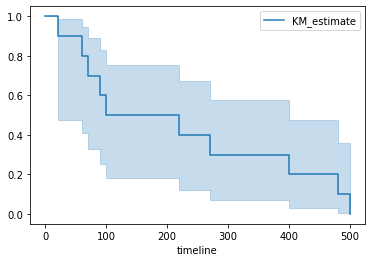

In [17]:
import pandas as pd
T = [20,60,70,90,100,220,270,400,480,500]

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T)
kmf.plot_survival_function();

# 4. KM 3

In [18]:
import pandas as pd
df = pd.DataFrame({'time':      [40,80,100,125,150], 
                   'deaths_obs':[0 ,5,4,5,0], 
                   'censored':  [11,0,8,8,14]})

df= df.set_index('time')

from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(df, observed_deaths_col='deaths_obs', censored_col='censored')
# weights, W, is the number of occurrences of each observation - helps with data compression.
pd.DataFrame({'T':T, 'E':E, 'W':W})

,T,E,W
0,40,0,11
1,80,1,5
2,100,1,4
3,100,0,8
4,125,1,5
5,125,0,8
6,150,0,14


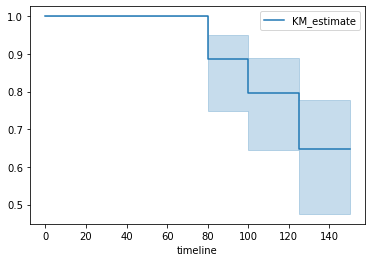

In [19]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T, E, weights=W)
kmf.plot_survival_function();

# 5. km4

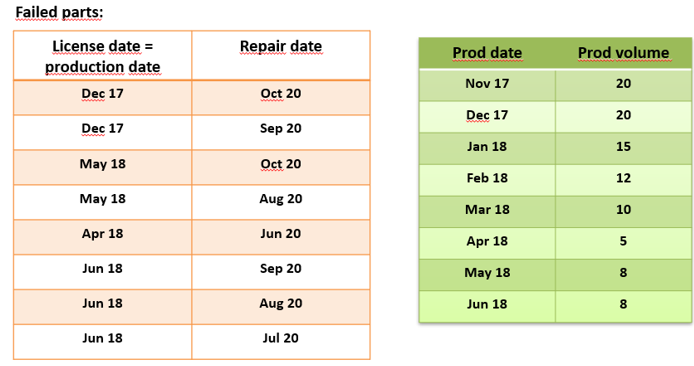

In [20]:
df = pd.DataFrame({'time':      [28,29,30,31,32,33,34,35], 
                   'deaths_obs':[3 ,2 ,1 ,0 ,0 ,0 ,2 ,0], 
                   'censored':  [5 ,6 ,4 ,10,12,15,18,20 ]})

df= df.set_index('time')

from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(df, observed_deaths_col='deaths_obs', censored_col='censored')
# weights, W, is the number of occurrences of each observation - helps with data compression.
pd.DataFrame({'T':T, 'E':E, 'W':W})

,T,E,W
0,28,1,3
1,28,0,5
2,29,1,2
3,29,0,6
4,30,1,1
5,30,0,4
6,31,0,10
7,32,0,12
8,33,0,15
9,34,1,2


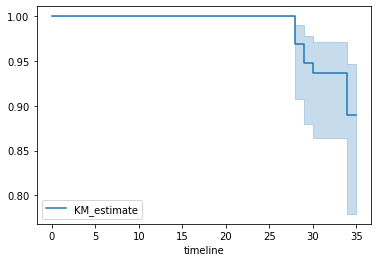

In [21]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T, E, weights=W)
kmf.plot_survival_function();

# 6 KM5

In [22]:
df = pd.DataFrame({'time':      [1,2,4,5,6,7,8,9], 
                   'deaths_obs':[3,2,2,0,1,1,1,1], 
                   'censored':  [0,0,46,80,98,118,99,79 ]})

df= df.set_index('time')

from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(df, observed_deaths_col='deaths_obs', censored_col='censored')
# weights, W, is the number of occurrences of each observation - helps with data compression.
pd.DataFrame({'T':T, 'E':E, 'W':W})

,T,E,W
0,1,1,3
1,2,1,2
2,4,1,2
3,4,0,46
4,5,0,80
5,6,1,1
6,6,0,98
7,7,1,1
8,7,0,118
9,8,1,1


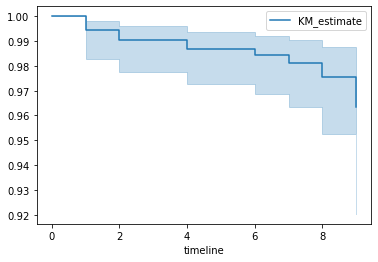

In [23]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T, E, weights=W)
kmf.plot_survival_function();

In [ ]:
wf.plot_hazard(ax=axes[0][1], label='hazard');
wf.plot_density(ax=axes[1][0], label='density');
wf.plot_cumulative_density(ax=axes[1][1], label='cumulative_density');

# Work Shop Ex1

In [54]:
df = pd.DataFrame({'time':      [1, 3, 5, 6, 7, 10, 13, 14, 15, 16, 17, 18, 19, 20], 
                   'deaths_obs':[124, 56, 118, 28, 109, 14, 179, 32, 46, 86, 44, 0, 0, 66], 
                   'censored':  [0, 0, 0, 0, 0, 0, 0, 0, 0, 29726, 19821, 19877, 14854, 9820]})

df= df.set_index('time')

from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(df, observed_deaths_col='deaths_obs', censored_col='censored')
# weights, W, is the number of occurrences of each observation - helps with data compression.
pd.DataFrame({'T':T, 'E':E, 'W':W})

,T,E,W
0,1,1,124
1,3,1,56
2,5,1,118
3,6,1,28
4,7,1,109
5,10,1,14
6,13,1,179
7,14,1,32
8,15,1,46
9,16,1,86


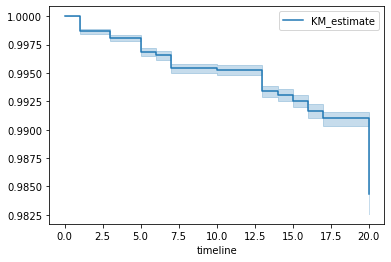

In [55]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T, E, weights=W)
kmf.plot_survival_function();

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 95000 total observations, 94098 right-censored observations>
   number of observations = 95000
number of events observed = 902
           log-likelihood = -7676.69
               hypothesis = lambda_ != 1, rho_ != 1

---
           coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_ 1142.09     161.66           825.24          1458.95 7.06 <0.005      39.11
rho_       1.11       0.04             1.04             1.19 3.09 <0.005       8.95
---
AIC = 15357.39

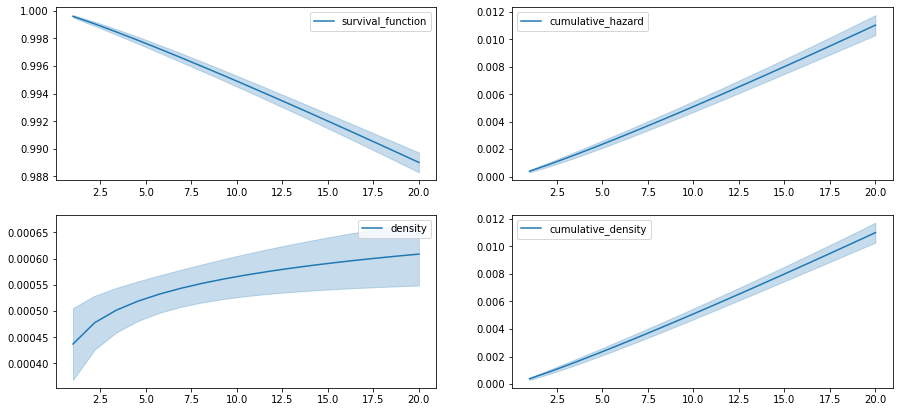

In [56]:
wf = WeibullFitter().fit(T, E, weights=W)
wf.print_summary()

fig, axes = plt.subplots(2,2, figsize=(15,7))

wf.plot_survival_function(ax=axes[0][0], label='survival_function');
wf.plot_cumulative_hazard(ax=axes[0][1], label='cumulative_hazard');
wf.plot_density(ax=axes[1][0], label='density');
wf.plot_cumulative_density(ax=axes[1][1], label='cumulative_density');

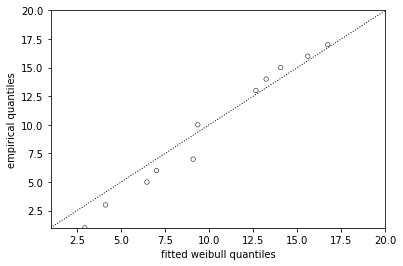

In [57]:
from lifelines.plotting import qq_plot
qq_plot(wf);

# Work Shop Ex2

In [59]:
df = pd.DataFrame({'time':      [8.5,9.5,10.0,15,17.5,18.5,20,22.5,23,30,33.5,40], 
                   'deaths_obs':[145,285,190,345,335,410,0,165,0,150,320,255], 
                   'censored':  [0,0,3100,8400,0,0,7900,0,4400,11800,0,4800]})

df= df.set_index('time')

from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(df, observed_deaths_col='deaths_obs', censored_col='censored')
# weights, W, is the number of occurrences of each observation - helps with data compression.
pd.DataFrame({'T':T, 'E':E, 'W':W})

,T,E,W
0,8.5,1,145
1,9.5,1,285
2,10,1,190
3,10,0,3100
4,15,1,345
5,15,0,8400
6,17.5,1,335
7,18.5,1,410
8,20,0,7900
9,22.5,1,165


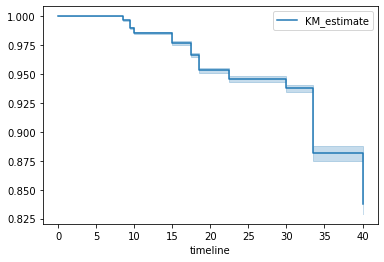

In [60]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T, E, weights=W)
kmf.plot_survival_function();

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 43000 total observations, 40400 right-censored observations>
   number of observations = 43000
number of events observed = 2600
           log-likelihood = -17294.07
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%     z      p   -log2(p)
lambda_  91.79       1.91            88.06            95.53 47.62 <0.005        inf
rho_      2.19       0.04             2.12             2.26 33.43 <0.005     811.63
---
AIC = 34592.14

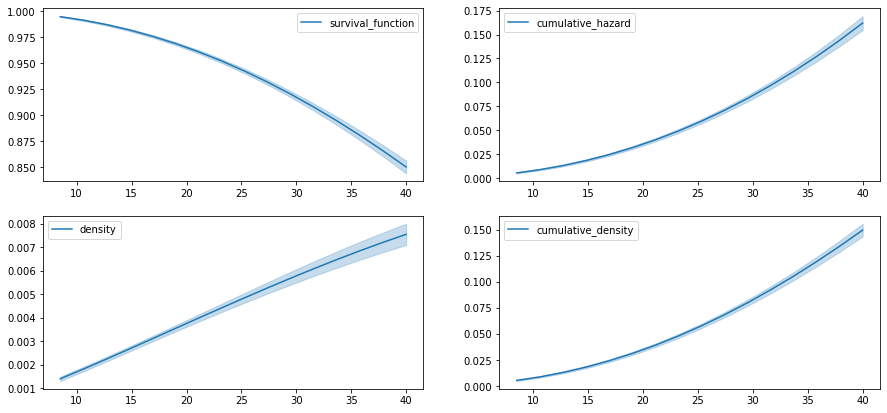

In [62]:
wf = WeibullFitter().fit(T, E, weights=W)
wf.print_summary()

fig, axes = plt.subplots(2,2, figsize=(15,7))

wf.plot_survival_function(ax=axes[0][0], label='survival_function');
wf.plot_cumulative_hazard(ax=axes[0][1], label='cumulative_hazard');
wf.plot_density(ax=axes[1][0], label='density');
wf.plot_cumulative_density(ax=axes[1][1], label='cumulative_density');

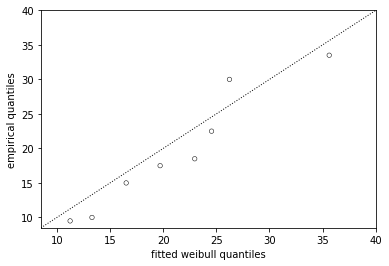

In [63]:
from lifelines.plotting import qq_plot
qq_plot(wf);

In [64]:
wf.median_survival_time_

77.65404876028921

In [65]:
wf.hazard_at_times([10,15,20,25,30,35,40])

10   0.00170287
15   0.00275988
20    0.0038876
25   0.00507098
30   0.00630071
35   0.00757037
40   0.00887524
Name: Weibull_estimate, dtype: float64

In [66]:
wf.percentile(0.9)

32.865139274324555